<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
06 Hypothesis Tests
<a class="tocSkip">   
</h1>  

In [3]:
# Standard Data Science Libraries Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import seaborn as sns
import scipy.stats as stats

#sns.set(rc={'figure.figsize':(12, 8.5)})
sns.set()

## An Introductory Example

+ Imagine that we have been developing a new method for battery manufacturing. And we think that our new method is so good that the batteries produced with this method will keep equipment running longer.  In fact, we claim that "*the batteries produced with this method will last longer than those produced with the previous method."* This claim is what we call **the alternative hypothesis**.

+ Since we are trying to do Statistics, we will try to gather some data to support our claim. Thus we take a random sample of $n = 100$ batteries produced with the new method. And, to our satisfaction, we observe that their average battery life is longer than it was before using the new method. 

+ More precisely, our *reference information* for the average battery life (in hours) using the previous method is that it is an **approximately normal** variable, with mean 
$$\mu_0 = 2.5h$$ 
And our sample of 100 batteries produced with the new method has an average battery life 
$$\bar X =  2.65h$$
with a sample standard deviation $s = 0.5h$. Therefore, the new method is better than the previous one, end of story.

+ Only that is certainly not the end of the story...

## The Null Hypothesis

+ A competing company trying to dispute our claim about the new method will say that our new method has a **null effect** on the battery life and that the data we observed is merely random noise, we have just been lucky enough to get a sample that favors our claim. This leads us to a situation were we have two opposite views about what the data is saying. 

![](https://media.giphy.com/media/OGBLtNMpS3p3SxtR2P/giphy-downsized-large.gif)  

+ Before the argument gets out of hand, let us introduce some basic rules and vocabulary to turn this into a --civilized and-- scientific argument. 
    + The hypothesis of the competing company will be called the **null hypothesis** $H_0$ (because it claims that the effect is null).   
    + The hypothesis that claims that the mean has actually changed with the new method is called the **alternative hypothesis** $H_a$.
    + The symbol $\mu$ always denotes the **real value of the mean for the sampled population**. In our example that means the batteries produced with the new method. This value $\mu$ is always unknown to everyone involved in the argument, no matter where they stand with respect to $H_0$ or $H_a$. we knew the value there would be no room for arguing.
    + Besides, in the discussion we used a **reference value $\mu_0$** which is to be compared with $\mu$ using the sample. In the example this value represents the mean battery life for the previous method. This value is well known and agreed upon by all participants in the discussion; in the example we know that $\mu_0 = 2.5h$.  
    + Both the null hypothesis $H_0$ and the alternative hypothesis $H_a$ are (opposing) statements about the relation between $\mu$ and $mu_0$. In the example the *alternative hypothesis* is written as 
    $$H_a:\{\mu > \mu_0\}$$
    while the null hypothesis is:
    $$H_0:\{\mu \leq \mu_0\}$$
    + Another ingredient of this situation is the **sample mean** $\bar X$, the *empirical value*  coming from the observations. It is the key ingredient that we will use to make a decision about these hypothesis. And it is also important to understand that the sample value (and the sampling process in general) is not part of this argument. All parts must agree that the way the sample mean was obtained is correct. In the example we had $\bar X = 2.65h$. Always keep in mind that this value is used to make the decision but it does **not** appear in either $H_a$ or $H_0$.

+ We have seen in the previous session how $\bar X$ is used to **estimate** (the unknown) $\mu$. Therefore if $\bar X$ is big compared with the reference value $\mu_0$ what hypothesis gets more support from the data? *How big should $\bar X$ be compared with $\mu_0$?*

# Becoming Quantitative: the CLT and p-Values.

+ Our starting point is therefore this: since $\bar X > \mu_0$ and $\bar X\approx\mu$ the data seem to favor the null hypothesis that says 
 $$H_a:\{\mu > \mu_0\}$$
+ However, we know that *bad samples* exist! Therefore, those who favor $H_0$ can claim that our sample mean $\bar X$ is just *due to chance*.  
+ Of course, the bigger the value of $\bar X$ the harder it gets to keep claiming that it is just a matter of chance and bad samples. In our example the competing company can say that $\bar X = 2.65h$ is due to bad luck, but if we had a sample with $\bar X = 5h$ it would seem extremely unlikely to come across such a sample mean, because samples as bad as that have a *really really low probability*.
+ Fortunately, using the CLT we can make the above paragraph quantitative and we can actually compute the probability of randomly getting a sample as bad as that one. Remeber that we are assuming that battery life is an *approximately normal* variable, and so our use of the CLT is well grounded.

## Defining the p-Value

+ To compute a probability we use the CLT. In order to do that we **initially assume that the null hypothesis is true**. In fact we will assume that the true mean $\mu$ is equal to the most convenient value for the $H_0$ supporters. That is we assume:
$$\mu = \mu_0$$
We will come back later to comment the reasons behind this choice.

+ If that is the case, then the CLT states that (recall that $\mu_0$ is known):
$$
\bar X \sim N\left(\dfrac{\mu_0}{\frac{s}{\sqrt{n}}}\right)
$$
and as a consequence:
$$
\quad\\
\dfrac{\bar X - \mu_0}{\frac{s}{\sqrt{n}}}\sim Z
\quad\\
$$
We can use this information and our knowledge of the standard normal $Z$ to compute the probability of randomly obtaining a sample *as bad for $H_0$ or worse* as the one we have. That is in fact the idea of the p-value.

+ **Example (continued).** recall that in the batteries example we have
  $$
  \quad\\
  \mu_0 = 2.5,\qquad n = 100,\qquad \bar X = 2.65,\qquad  s = 0.5 
  \quad\\
  $$
  Thus the value of $Z$ that we obtain is:
  $$
  \quad\\
  \dfrac{\bar X - \mu_0}{\frac{s}{\sqrt{n}}} = 
  \dfrac{2.65 - 2.5}{\frac{0.5}{\sqrt{100}}} = 3
  \quad\\
  $$
  The above probability computation is illustrated below. We are essentially computing the probability of the right tail of $Z$ (coming from the sample mean):
  ![](./fig/07-01-PValor_Ejemplo.png)

+ Let us use Python to get the p-value. Recall that the right tail probability is provided by the *survival function* `sf` from the SciPy `stats` module:

In [4]:
mu0 = 2.5
n = 100
barX = 2.65
s = 0.5

Zscore = (barX - mu0)/(s/np.sqrt(n))
print("The Z score for this sample is {:.4}".format(Zscore))

pValue = stats.norm.sf(Zscore)
print("And the resulting p-value is: {:.4}".format(pValue))

The Z score for this sample is 3.0
And the resulting p-value is: 0.00135


+ Now that we have a quantitative measure it is important to state clearly what that means: if the null hypothesis is true and $\mu = \mu_0 = 2.5$ then the probability of randomly drawing a sample with a mean $\bar X\geq 2.65$ is less than $0.0014$.

+ The supporters of the null hypothesis $H_0$ can still claim that this is just a bad sample, but now we have to face the fact that the probability says that we only get a sample as bad as this *one out of a thousand samples*.

+ Let us try to make this point more clear. Imagine that instead of $\bar X = 2.65$ we had a bigger sample mean such as $\bar X = 2.7$. This is further away to the right of $\mu_0$ and therefore is more in favor of $H_a$. If we use that value to compute a p-value we would first get the corresponding $Z$ score:
  $$
  \quad\\
  \dfrac{\bar X - \mu_0}{\frac{s}{\sqrt{n}}} = 
  \dfrac{2.7 - 2.5}{\frac{0.5}{\sqrt{100}}} = 4
  \quad\\
  $$
and then the p-value would be: 

In [5]:
mu0 = 2.5
n = 100
barX = 2.7
s = 0.5

Zscore = (barX - mu0)/(s/np.sqrt(n))
print("The Z score for this sample is {:.4}".format(Zscore))

pValue = stats.norm.sf(Zscore)
print("And the resulting p-value is: {:.4}".format(pValue))

The Z score for this sample is 4.0
And the resulting p-value is: 3.167e-05


+ Getting a sample with $\bar X = 2.7$ or higher can only occur about three out of one hundred thousand times. That is a very low probability and it becomes increasingly hard to believe that this sample mean is just a random coincidence. Therefore with this p-value we would **reject the null hypothesis**. 

## More on p-Values and their Use for Hypothesis Testing 

+ The basic mechanic of any Hypothesis test is as follows:
    + We clearly state the null and alternative hypothesis and the reference values they use.
    
    + We take a sample and use some sampling distribution theoretical result (such as the CLT) to compute the *p-value*. That is, the probability of those samples that favor $H_a$ as much as the one we have. In this step *we assume that $H_0$ is true*.
    + **If the p-value is low enough we always reject the null hypothesis**.
    
+ It may help to look at the p-value this way: it measures how *weird*, unexpected or unlikely the sample results appear to someone who believes that the null hypothesis is true. In symbols:
$$
\quad\\
\text{p-value } = P(\text{ sample data }\,|\, H_0\text{ is true})
\quad\\
$$

+ The null hypothesis represents in most contrasts the established knowledge or the scientific or technical consensus. It is therefore necessary in most cases to have sufficient evidence in order to reject $H_0$. And the structure of hypothesis tests reflects this: the null hypothesis is given some advantage over the null hypothesis, so to speak. For example, when we compute the p-value for $H_0 = \{\mu \leq \mu_0\}$ we choose the value $\mu = \mu_0$ (instead of using any other $\mu < \mu_0$) because this is the value that will give result in higher values of the p-value, thus making it harder to reject the null. 

+ That is also the reason why we include all the tail of the normal when computing the p-value. If we were to include only a fraction of the tail, then the p-value would be smaller and that would give $H_a$ some advantage. 

## Rejecting the Alternative Hypothesis

+ **Example (continued):** Let us go back to the batteries example but this time suppose that the sample mean we obtain is $\bar X = 2.51$ keeping all other numbers equal. Then the p-value computation would be: 

In [6]:
mu0 = 2.5
n = 100
barX = 2.51
s = 0.5

Zscore = (barX - mu0)/(s/np.sqrt(n))
print("The Z score for this sample is {:.4}".format(Zscore))

pValue = stats.norm.sf(Zscore)
print("And the resulting p-value is: {:.4}".format(pValue))

The Z score for this sample is 0.2
And the resulting p-value is: 0.4207


+ For someone who believes the null hypothesis to be true that means that this value $\bar X = 2.51$ of the sample mean would not be a surprise at all. In fact that is the kind of value you expect to see 42% of the times! Therefore, with such a large p-value we would not have enough evidence to reject the null and we would instead say that we reject the alternative $H_a$. Even though $\bar X > \mu_0$, the difference in favor of $H_a$ is *just not big enough*. 

+ Of course if we had obtained $\bar X \leq \mu_0$ the evidence in favor of $H_a$ would simply be non-existent. This causes some confusion at first, especially after we learn in the next sections about other types of contrasts involving different inequalities. So let us make an example to try to help you recognize this situation if you ever find yourself in it. 
Imagine now that the sample mean in the battery example is $\bar X= 2.45$. With this sample mean trying to convince anyone that $\mu > \mu_0 = 2.5$  is preposterous. But let us ignore that for a moment and compute the p-value:

In [7]:
mu0 = 2.5
n = 100
barX = 2.45
s = 0.5

Zscore = (barX - mu0)/(s/np.sqrt(n))
print("The Z score for this sample is {:.4}".format(Zscore))

pValue = stats.norm.sf(Zscore)
print("And the resulting p-value is: {:.4}".format(pValue))

The Z score for this sample is -1.0
And the resulting p-value is: 0.8413


+ As we can see, the p-value in this case is not just not small, it is in fact very big for a probability. If you ever find yourself facing a p-value this big, *double check that you are testing the right hypothesis*: there is a high chance that you have switched some inequality. 

## Significance Level

+ Once we have a p-value the basic mechanic of hypothesis test is very simple:
    + If the p-value is small enough we reject the null hypothesis.
    + If the p-value is not small enough we reject the alternative hypothesis.
    
  But what do we mean by *small enough*? In order to make this easier and to set some common standards many scientific fields agreed to consider that p-values below $0.05$ would be consider small enough and deemed *significant*. The value  $0.95 = 1 - 0.05$ is called the *significance level* of the test, and $0.05$  often acts as a threshold to decide what is considered sufficient statistical evidence. But the value $0.05$ is in itself arbitrary and we may consider a different significance level, such as $0.99 = 0.01$, much in the same way that we may consider different levels of confidence when computing confidence intervals. 
  
+ In fact both concepts, confidence intervals and hypothesis test, are connected and we use very similar notation. The significance level will we called in this notes $sl$ and we define $\alpha = 1 - sl$ in the context of a hypothesis test. Therefore working with a significance level $sl = 95\%$ is the same as setting $\alpha = 0.05$, etc. In particular we use this percent terminology which is a normally harmless abuse of notation.

+ **Example:** if we work with a significance level of $99$% and we get a p-value $p = 0.03$ then we would compare the p-value with $\alpha = 1 - 0.99 = 0.01$ and since
$$
\text{p-value} = 0.03 > 0.01 = \alpha
$$
we would conclude that the p-value is not small enough and we would reject the alternative $H_a$.


## Tests with Small Samples

+ In the above examples we have assumed that the battery life is an approximately normal variable. And since the sample size was reasonably large ($n = 100$) we used $Z$ to obtain the p-values. In many cases however the sample sizes are smaller. Then we must resort to the use of the Student's $t$ distribution, just as we did in the case of confidence intervals. 

+ **Example:** we will repeat the p-value computation for the original battery example keeping all sample values except for the the size, which we now take to be $n = 20$. Then we *must* use Student's $t$ to compute the probability of the right tail: 

In [8]:
mu0 = 2.5
n = 20
dof = n - 1
barX = 2.65
s = 0.5

Tscore = (barX - mu0)/(s/np.sqrt(n))
print("The t score for this sample is {:.4}".format(Tscore))

pValue = stats.t.sf(Tscore, df = dof)
print("And the resulting p-value is: {:.4}".format(pValue))

The t score for this sample is 1.342
And the resulting p-value is: 0.09776



+ Note that in this case we have obtained a much larger p-value. Why is that? Because with a small sample we have less information and, as we have already discussed, that means that we need to *push* more probability into the tails of the distribution. In particular, sample means further away from the center get higher probabilities, making it harder to reject the null. In this case if we are working with a 95% significance level we would have to compare the above p-value against 0.05. And so in this case all other things equal but with a smaller sample we *would fail to reject the null* (we would reject the alternative). This increased difficulty to reject the null is to be expected: smaller sample means less evidence of a true effect of the new method.

# Hypothesis Testing with Python

+ We have already been using Python to compute p-values, but the examples we have met until now assumed that we had already computed the mean and standard deviation from the sample and we did the p-value computation by taking the Z-score to measure the tail of the normal $N(0, 1)$. But this is not a very efficient procedure when working with the different variables in a data frame, the typical situation we face when working with data files like the ones we haven been using in previous sessions. 

+ Python, and in particular the Scipy `stats` module offer many convenient functions to perform the kind of hypothesis test that we will need. Let us see an example. 

+ **Example:** in Exercise S05-003 we worked with data about $NO_2$ levels in the water of a reservoir. Remember we had a sample with these values (in mg/l):
```
        0.04, 0.05, 0.03, 0.06, 0.04, 0.06, 0.07, 0.03, 0.06, 0.02
``` 

  Let us use these samples to test the hypothesis that the $NO_2$ level in the reservoir is higher than the danger level of 0.03mg/l. That is we are testing the alternative hypothesis 
$$
H_a = \{\mu > \mu_0 = 0.03\}
$$
We will work with a significance level of 95% and to carry out the test we will use the `scipy.stats.ttest_1samp` function (see the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html))

In [9]:
no2_data = np.array([0.04, 0.05, 0.03, 0.06, 0.04, 0.06, 0.07, 
                     0.03, 0.06, 0.02])

Tscore, pValue = stats.ttest_1samp(no2_data, 
                                   popmean=0.03,
                                   alternative="greater")

print("The sample size is {:3d}".format(no2_data.size))
print("The sample mean is {:.4}".format(no2_data.mean()))
print("The T score is {:.4}".format(Tscore))
print("And the corresponding p-value is {:.4}".format(pValue))

The sample size is  10
The sample mean is 0.046
The T score is 3.073
And the corresponding p-value is 0.006646


+ Therefore with a significance level of 95% we would reject the null (since the p-value is less than 0.05) and conclude that these data provide enough evidence that the $NO_2$ level is **not** below 0.03mg/l.

+ In the above code we used the argument `alternative="greater"`. We will soon discuss other types pf contrasts and then we will see how to use this argument to tell Python about that. 

## Working with Data Files

+ The same method can be applied to the data stored in a column of a Pandas DataFrame. Which leads us to the following:

 **Exercise (S06-001):** The `mpg` data set (we already used it in Session 02) can be downloaded [in csv format with this link](https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv). It contains information about fuel consumption (miles per gallon, thus mpg) and other characteristics of some car models from 1999 to 2008. Use the `cty` variable in this data set to test the alternative hypothesis 
$$
\quad\\
H_a = \{\mu > \mu_0\}\quad\text{ where }\mu_0 = 16\\
$$
Assume that the variable is approximately normal.

In [10]:
# %load "./exclude/S06-001.py"

# Other Tests for the Mean

## Left Tail Tests

+ **Example:** a quality control inspector is examining the claim that the  oil cans from certain brand contain 1000g of oil. After examining a random sample of 100 cans he found that the average weight was $998.5g$ with a sample standard variance of $s^2 = 36.1g$. Looking at the data the inspector wonders if the true average weight is less that the advertised 1000g. Using a significance level of 95%, what would be the answer to that question? What would be the p-value for this test?  
The main difference between this example and our previous battery example is the direction of the inequalities involved. We again have the sample values and a reference value $\mu_0 = 1000g$

In [11]:
mu0 = 1000

n = 100
barX = 998.5
s = np.sqrt(36.1)

+ The alternative hypothesis (the inspector's claim) this time is that the real (and unknown) population mean $\mu$ is **actually smaller** than $\mu_0$.
$$
\quad\\
H_a:\{\mu < \mu_0\},\quad\text{ with }\quad\mu_0 = 1000\\
$$
The corresponding null hypothesis is clearly
$$
\quad\\
H_0:\{\mu \geq \mu_0\},\quad\text{ with }\quad\mu_0 = 1000\\
$$

+ The structure of the test, once this is clear, is very similar. But the figure we should look at now uses the **left tail** of the normal (or Student's $t$) distribution.
![](./fig/07-03-RejectionRegionLeftTail.png)

  Assuming that the sample size is big enough we can use the sample values to obtain a Z-score. The meaning of the critical point $z_p$ is unchanged: it is always the point whose **left tail** has probability $p$ in $Z$. But now since we are using the left tail and a significance level of 95% (this is the probability of the central, close to 0 region), then we have $\alpha =0.05$ to allocate in the left tail, and that is why **we use $z_{0.95} = z_{1 - 0.05} = z_{1 - \alpha}$ for a left tail test** like this one. If the Z-score from the sample falls to the left of $z_{1 - \alpha}$, into what is called the **rejection region** for the test. If that is the case then the corresponding p-value will be lower than $\alpha = 0.05$ and we will reject the null. Let us use SciPy to get the Z-score, critical value and p-value:

In [12]:
Zscore = (barX - mu0)/(s/np.sqrt(n))
print("The Z score for this sample is {:.4}".format(Zscore))


sl = 0.95
alpha = 1 - sl
criticalValue = stats.norm.isf(1 - alpha)
print("The critical value (defining the rejection region) is: {:.4}".format(criticalValue))

pValue = stats.norm.cdf(Zscore)
print("And the resulting p-value is: {:.4}".format(pValue))

The Z score for this sample is -2.497
The critical value (defining the rejection region) is: -1.645
And the resulting p-value is: 0.006271


+ **Very important:** note that we have changed from the survival function `sf` to `cdf` when computing the p-value because now we are looking at the probability of the left tail. Alternatively we can take the absolute value of the Z-score and always use the survival function:

In [13]:
Zscore = np.abs((barX - mu0)/(s/np.sqrt(n)))
print("The absolute value of the Z score for this sample is {:.4}".format(Zscore))

pValue = stats.norm.sf(Zscore)
print("And the resulting p-value is: {:.4}".format(pValue))

The absolute value of the Z score for this sample is 2.497
And the resulting p-value is: 0.006271


+ Either way, the p-value is the same and it is clearly small enough to reject the null and conclude that the data do not sustain the hypothesis that the average can contains $1000g$ of oil or more.

## Two Sided Tests

+ **Example:** let us revisit the oil cans example, but now let us see it from the point of view of the manufacturer. If you are trying to sell 1000g of oil per can then you must worry about these two scenarios:
    + If your cans contain too much oil then you are losing money. 
    + If your cans contain too little oil then you risk a fine from the quality control inspection.

  Therefore your goal is to stay as close as possible to the 1000g target and deviations **to either side** of this value are to be avoided. In this case the situation that you want to avoid can be phrased as a new alternative hypothesis:
 $$
\quad\\
H_a:\{\mu \neq \mu_0\},\quad\text{ again with }\quad\mu_0 = 1000\\
$$
And now the null hypothesis is the equality of both values:
$$
\quad\\
H_0:\{\mu = \mu_0\}\\
$$
These hypothesis define what we call a **two-sided test**, to distinguish it from the previous **one-sided (left or right) tests** that used only one tail of the sampling distribution. Here the reference figure is this one:
![](./fig/07-04-RejectionRegionTwoSided.png)
Now when working with a significance level $sl = 1 - \alpha$ we need to allocate $\alpha/2$ probability **for each of the two tails**. That is why we need to use the critical points $z_{1 - \alpha/2}$ (to the left) and $z_{\alpha/2}$ to define the rejection region, which is the union of the two tails defined by these critical points. The critical points only differ in their sign. And in such a test the p-value computation is slightly more complicated because we need to **take into account the probability of both tails.**  The reason why we do this is because the scores in both tails contradict the null and if we were to  use only one of them then we would get a too small p-value, making it unfairly easy to reject the null. 

+ The way we organize this test in Python is similar, but now we need to remember that both tails count. Since they are symmetric, we can simply **compute the probability of the right tail and double it**. For the present example of the oil cans from the manufacturer's perspective:

In [14]:
Zscore = np.abs((barX - mu0)/(s/np.sqrt(n)))
print("The absolute value of the Z score for this sample is {:.4}".format(Zscore))

sl = 0.95
alpha = 1 - sl
criticalValue = stats.norm.isf(alpha/2)
print("The right side critical value is: {:.4}".format(criticalValue))

## Notice the factor two here
pValue = 2 * stats.norm.sf(Zscore) 
print("And the resulting p-value is: {:.4}".format(pValue))

The absolute value of the Z score for this sample is 2.497
The right side critical value is: 1.96
And the resulting p-value is: 0.01254


+ Note that the p-value that the manufacturer gets for this two-sided test is higher than the one that the inspector obtained (with the same sample data). That is generally true: using the same data is is harder to reject the null using a two sided test. But you should always use the kind of test that corresponds to *your alternative hypothesis*. Otherwise you will be getting the answer for a different question. In this example observe that with the resulting p-value and $\alpha = 0.05$ the manager should anyway reject the null and, by looking at the sample mean, increase the oil content of the cans to avoid being fined.

# Errors of Types I and II

+ A hypothesis test uses samples to make a decision between two competing hypothesis. But we know that bad samples exist and therefore, due to the intrinsic random nature of sampling, we can get a bad sample and make the wrong decision. And there are two kinds of errors that we can make, as illustrated in this table:  
<div class="center">
<table>
<tbody>
<tr class="odd">
<th style="text-align: center;"></th>
<th style="text-align: center;"></th>
<th colspan="2" style="text-align: center;"><u><strong>What hypothesis is true?</strong></u></th>
</tr>
<tr class="even">
<td style="text-align: center;"></td>
<td style="text-align: center;"></td>
<td style="text-align: center;"><strong><span
class="math inline"><em>H</em><sub><em>a</em></sub></span> (alternative)
is true</strong></td>
<td style="text-align: center;"><strong><span
class="math inline"><em>H</em><sub>0</sub></span> (null) is
true</strong></td>
</tr>
<tr class="odd">
<td style="text-align: left;"><u><strong>Test Result</strong></u></td>
<td style="text-align: center;"><strong>Reject <span
class="math inline"><em>H</em><sub>0</sub></span></strong></td>
<td style="text-align: center;">Right decision</td>
<td style="text-align: center;">Error type I (<span
class="math inline"><em>α</em></span>)</td>
</tr>
<tr class="even">
<td style="text-align: center;"></td>
<td style="text-align: center;"><strong>Reject <span
class="math inline"><em>H</em><sub><em>a</em></sub></span></strong></td>
<td style="text-align: center;">Error type II (<span
class="math inline"><em>β</em></span>)</td>
<td style="text-align: center;">Right decision</td>
</tr>
</tbody>
</table>
</div>  

  We will see why we have included the symbols $\alpha$ and $\beta$ in this table.

+ This kind of two way table is frequent in Statistics. One of the best known classical situations is that of **diagnostic tests**, where the analogous **contingency table** would look like this:
<table>
<tbody>
<tr class="odd">
<td style="text-align: left;"></td>
<td style="text-align: left;"></td>
<td colspan="3" style="text-align: center;"><u><strong>Real state of the patient</strong></u></td>
</tr>
<tr class="even">
<td style="text-align: left;"></td>
<td style="text-align: left;"></td>
<td style="text-align: center;"><strong>Positive (condition present)</strong></td>
<td style="text-align: center;"><strong>Negative (condition absent)</strong></td>
</tr>
<tr class="odd">
<td style="text-align: left;"><u><strong>Test Result</strong></u></td>
<td style="text-align: left;"> <strong>Positive </strong></td>
<td style="text-align: center;">TP = True Positive</td>
<td style="text-align: center;">FP = False Positive</td>
</tr>
<tr class="even">
<td style="text-align: left;"></td>
<td style="text-align: left;"> <strong>Negative </strong></td>
<td style="text-align: center;">FN = False Negative</td>
<td style="text-align: center;">TN = True Negative</td>
</tr>
</tbody>
</table>  

  The language for these diagnostic tests is intuitive and appealing. Because of that it is also used in the context of more general situations like the hypothesis tests. And when you study the *Classification Problem* in Machine Learning you will see that this 2 by 2 contingency table is an example of the more general notion of *Confusion Matrix*, which describes the performance of a classification algorithm in the context of a multilevel factor with possibly more than two levels. 

+ In many problems, *Type I* errors are considered more important. This is the situation in which you mistakingly reject a true null hypothesis (a false positive, diagnose as sick a patient who is not).  You can think of this as another example of the way that the null hypothesis is *protected* in testing. 

+ What is the probability of (randomly getting a misleading sample and) making a type I error when we use a significance level $sl$? This is:
$$
\quad\\
P(\text{ type I error }) = P(\text{ reject }H_0\,|\, H_0\text{ is true})
\quad\\
$$
and this happens precisely when we get one of those samples that result in a p-value smaller than $\alpha$. Therefore
$$
\quad\\
P(\text{ type I error }) = \alpha
\quad\\
$$



## Sample Size and Power

+ Let us now turn to the symbol $\beta$ that appears in the error table for the test and its relation with the concept of *statistical power*. As the table suggests:
$$
\quad\\
\beta = P(\text{type II error}) = P(\text{ reject }H_a\,|\, H_a\text{ is true}) \\
$$
But since 
$$
\quad\\
P(\text{ reject }H_a\,|\, H_a\text{ is true}) = 
1 - P(\text{ reject }H_0\,|\, H_a\text{ is true})$$
and
$$ 
\quad\\
P(\text{ reject }H_0\,|\, H_a\text{ is true}) = 
P(\text{ reject }H_0\,|\, H_0\text{ is false})\\
$$
We combine this expressions to get:
$$
\quad\\
P(\text{ reject }H_0\,|\, H_0\text{ is false}) = 1 - \beta\\
$$
The probability of the left hand side measures how good the test is at rejecting false nulls, and that is a nice feature for a test to have! So nice that we give it a name:
<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\quad\textbf{Power of a Statistical Hypothesis Test}
\quad\\
\quad\\
\text{The power of a test is:}
\quad\\
\quad\\
\quad P(\text{ reject }H_0\,|\, H_0\text{ is false}) = 1 - \beta
\quad\\
$
}
$$
</p> 

+ In general we would like to keep $\alpha$ and $\beta$ small, as they are both related to the probability of making some kind of error. Keeping $\beta$ low means aiming at power values as close to 1 as possible. But trying to make both $\alpha$ and $\beta$ small is usually impossible, and the analogy with the diagnostic tests helps to understand why. All the strategies that help a test to have very few false positives tend to increase the overall number of negatives and in particular they also increase the false positive rate. 

+ In the particular case of the hypothesis test for the mean using the CLT we can show that power of the test can be expressed as:
<p style='font-family: Optima;color:blue;background-color:#f0f0f5'>
$$
\fbox{
$
\quad\\
\text{power} = 1 - \beta = K\, \dfrac{\delta\,\sqrt{n}\,\alpha}{\sigma}
\quad\\
$
}
$$
</p> 

  where $K$ is a certain constant (we don't need to worry about it) and:
    + $n$ is the sample size
    + $\sigma$ is the population standard deviation.
    + $\delta$ is the **effect size**. That is the *minimal difference between $\mu$ and $\mu_0$ that we want the test to be able to detect* (in order to reject the null). This is analogous to the width of the confidence interval that we discussed in the previous session. 

+ Most statistical tests have **power equations** like this, with more complicated mathematical expressions but similar behavior. The first thing that we should observe when looking at that equation is that when $\alpha$ decreases while keeping the rest of the values on the right hand side fixed, the power also decreases. This confirms what we said: trying to lower both $\alpha$ and $\beta$ is hard, because they tend to have this kind of relation. 

+ Regarding the other ingredients of the power equation:
    + If $n$ is big, the test will have more power. This is no surprise: bigger samples make everything better in Statistics. 
    + The role of $s$ is also clear. If the population is widely spread then the same thing will happen with the sample means (see the CLT). And that makes the job of the test harder, lowering its power. As we saw in the discussion of confidence intervals this is usually estimated with a pilot study.
    + If we want the effect size $\delta$ to be very small then we will have a lot of false negatives (high $\beta$) and as a consequence the test will have a small power value. If on the other hand we consider ourselves satisfied with the possibility of detecting a comparatively larger effect then the test will have good power values. Aiming for a very sensitive test will ruin its power!

## Power Equations in Python

+ The `statsmodels` library in Python contains functions that help us work with these power equations. For example, if we are testing for the mean using the Student's $t$ distribution (or the $Z$ since they agree whenever $Z$ can really be used) then we can use the `tt.solvepower` function from that module. The way this works is the following. The function has four parameters (and an additional one called `alternative` to decide if we are doing a two-sided or one-sided test):  

    + `nobs`, the number of observations or sample size, that we usually call $n$ in these notes.
    + `alpha`, the value of $\alpha$ with the meaning we know.
    + `power`, which is $1 - \beta$ as we know.
    + `effect_size`; be careful with this one, it is the *standardized* effect size, meaning that it equals $\delta / \sigma$ with our notation.

  Now, you provide the function with exactly three of these four parameters and the function will solve the power equation for the remaining one and return this as output. Typical use cases are:
  + Finding the power of a test that you are planning or have already conducted.
  + Finding the sample size that you need in order to guarantee a certain power value for a test.

+ **Example:**   
    + (a) Let us find the power of a one-sided mean test where:

In [15]:
delta = 0.1
sd = 0.5
alpha = 0.05
n = 100

+ We import the required module and use the `tt.solvepower` function as follows:

In [16]:
import statsmodels.stats.power as smp

power = smp.ttest_power(effect_size = delta / sd, 
                nobs=n, alpha=alpha, alternative="larger")

print("The power for the test is {:.3}".format(power))

The power for the test is 0.634


+ (b) Let us now use the above sample values as a pilot study and find the sample size that we need in order to get a power equal to 80% (i.e. 0.8).

In [17]:
power = 0.8

sample_size = smp.tt_solve_power(effect_size = delta / sd, 
                power = power, alpha = alpha, alternative = "larger")

print("The minimum sample size to get that power is at least {:3d}".format(
        int(np.ceil(sample_size))))

The minimum sample size to get that power is at least 156


# Hypothesis Test for the Variance

+ We will look at hypothesis test for the variance to give you an example beyond the case of the mean and also because variance tests are an essential component of many more advanced statistical methods. 

+ The kind of tests we will consider includes both one sided and two sided hypothesis, as in these three cases:
$$\begin{cases}
&\text{Null Hypothesis}&\text{Alternative Hypothesis}\\
\text{One sided (left):}& H_0 = \{\sigma^2 \leq \sigma^2_0\}, & H_a = \{\sigma^2 > \sigma^2_0\}\\
\text{One sided (right):}& H_0 = \{\sigma^2 \geq \sigma^2_0\}, & H_a = \{\sigma^2 < \sigma^2_0\}\\
\text{Two sided:}& H_0 = \{\sigma^2 = \sigma^2_0\}, & H_a = \{\sigma^2 \neq \sigma^2_0\}
\end{cases}
$$

+ Recall that we already saw that, since the variance is a measure of spread, the right kind of comparison uses quotients and not differences. And that the sampling distribution of the variance was described by this equation
$$
\quad\\
Y = (n-1)\dfrac{s^2}{\sigma^2}\, \sim\,\chi^2_k,\quad\mbox{ where }\,k=n-1.\\
$$
This equation can be used to obtain a $Y$-score that will define a p-value when we use the corresponding $\chi^2_k$ as the probability scale.  The only thing to keep in mind is that when we use this result we will change $\sigma^2$ with $\sigma_0^2$ because, just as in the case of the mean, that choice is the one that favors the null hypothesis the most.

+ Finally, when a test for the standard deviation is required we have to pay to attention and take the square or the square root of the sample values as needed. 

+ **Example:** A pharmaceutical lab claims that it produces tablets for a certain drug with very homogeneous diameters, because the standard deviation of the diameter is 0.5mm (according to the lab). A random sample of 15 tablets had a standard deviation $s = 0.7mm$. Using a significance level of 5%, *do you believe the claim from the lab?*

  The reference value is $\sigma_0^2 = 0.5^2$ and the hypothesis to be tested are: 
$$
H_0 = \{\sigma^2 \leq \sigma^2_0\}, \qquad H_a = \{\sigma^2 > \sigma^2_0\}
$$
  Using the sample data we compute the $Y$ score:
$$
Y = (n-1)\dfrac{s^2}{\sigma_0^2} = (15 - 1) \dfrac{0.7^2}{5^2}
$$
  And now to get the p-value we need to decide whether we will use the left or the right tail of this $Y$ score in $\chi^2_{14}$. **We highly recommend using a plot of the $\chi^2$ distribution to think about this!** In this case the plot below should help you realize that if the alternative hypothesis is true, then larger values of $s$ are to be expected and this will in turn result in larger $Y$ scores. That means that the right tail of the $Y$ score contains those values that favor the alternative hypothesis and thus it is the right tail that we should use to obtain the p-value.
![](./fig/07-05-Chi2TestForVariance.png)

Let us use Python for this:

In [18]:
# Sample values
n = 15
s = 0.7
# Reference value
sigma0 = 0.5

Yscore = (n - 1) * s**2 / sigma0**2

pValue = stats.chi2.sf(Yscore, df = n - 1)
print("The p-value for the test is {:.3}".format(pValue))

The p-value for the test is 0.0169


+ Therefore using a 95% significance level we (compare the p-value with $\alpha = 0.05$ and) conclude that we reject the null hypothesis. The data do not support the lab claim about the diameter of the tablets.

+ **Exercise (S06-002).** Using the data in the **first column** of the linked [GEAR.DAT](https://www.itl.nist.gov/div898/handbook/datasets/GEAR.DAT) file, test the null hypothesis:
$$
H_0 = \{\sigma^2 = \sigma^2_0\}
$$
where $\sigma_0^2 = 0.000025$. Use a 95% significance level. 

In [32]:
# %load "./code/S06-002.py"

Sample standard deviation s =  0.006279
Sample size n =   100
The chi square score is 156.1
The p-value is 0.0004427


In [18]:
gear = pd.read_csv("data/GEAR.txt")
gear.head()

,DIAMETER,BATCH
0,1.006,1.0
1,0.996,1.0
2,0.998,1.0
3,1.000,1.0
4,0.992,1.0


In [17]:
s = gear.DIAMETER.std()
print(s**2)
n = gear.shape[0]
print(n - 1)

sigma0_2 = 0.000025


chiScore = (n - 1) * s**2/sigma0_2

print(chiScore)

2 * stats.chi2.sf(chiScore, df = n -1)

3.942464646464642e-05
99
156.12159999999983


0.0004426690022928119

# The Problem of Multiple Testing

+ Hypothesis testing is the classical and most widespread method in the academic world to confirm a scientific discovery. But this method is subject to errors, misunderstandings or even intentional abuse. The first and foremost problematic situation arises in the contest of **multiple tests**.

+ **Example.** we already know that $\alpha$ is the probability of making an (honest) type I error mistake. Let us suppose that $\alpha = 0.05$. Let us suppose that we make 20 independent tests of 20 null hypothesis $H_0$ **all of which are actually true**. What is the probability that we come across a *bad* sample (at least one), reject the (true) null and make a type error I mistake? Clearly this situation has all the ingredients of a binomial $X \sim B(20,\alpha)$ with $X = $ number of rejected $H_0$. Therefore the answer to our question is
$$
P(X > 0) = 1 - P(X = 0) 
$$
and using Python:

In [19]:
n = 20
p = 0.05
k = 0
Prob_typeI = 1 - stats.binom.pmf(k, n, p)b
print("The probability of making at least a Type I error in 20 independent tests is {:.3}".format(Prob_typeI))

The probability of making at least a Type I error in 20 independent tests is 0.642


+ That means that simply by repeatedly testing 20 true hypothesis there is a 64% chance that we will declare some test to be *significant* and reject the null, making at least a type I error. 

+ **Exercise (S06-003)** the result of the binomial can be checked by a simulation. Simulate an experiment in which you have 20 independent random samples of size 50 from 20 normal populations all of them of type $Z = N(0, 1)$. And test the (true) null hypothesis 
$$
\quad\\
H_0:\{\mu = \mu_0\}\\
$$
for each of these 20 populations, using always a 95% significance level. Count the number of type I errors that you eventually make. Repeat this experiment a large number of times (take $N = $ 10000 times) and check the results against the corresponding binomial.

   counts  freqs
0       0   3577
1       1   3829
2       2   1869
3       3    573
4       4    131
5       5     16
6       6      4
7       7      1


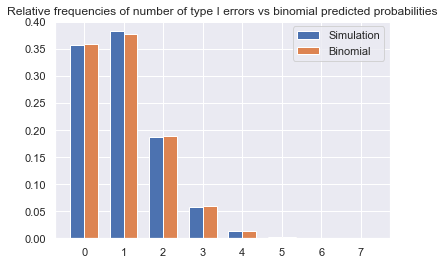

In [5]:
# %load "./exclude/S06-003.py"
# S06-003.py

data = np.array(np.random.default_rng(2022).normal(loc = 0, scale = 1, size = (50, 20, 10000)))

def ttest_pvalue(sample, mu0, sl, hyp):
    Tscore, pValue = stats.ttest_1samp(sample, 
                                   popmean=popmean,
                                   alternative="greater")

Tscores, pValues = stats.ttest_1samp(data, popmean = 0, axis = 0, alternative='two-sided')

counts, freqs = np.unique(np.sum(pValues < 0.05, axis=0), return_counts=True)

print(pd.DataFrame({"counts":counts, "freqs": freqs}))

width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(counts - width/2, freqs/10000, width, label='Simulation')
rects2 = ax.bar(np.arange(8) + width/2, stats.binom.pmf(np.arange(8), 20, 0.05), width, label='Binomial')
ax.set_title('Relative frequencies of number of type I errors vs binomial predicted probabilities')
ax.legend()

+ The problem we have explored in this example and exercise could be due to ignorance but it could also be part of some shady scheme trying to fake a significant result. These kind of manipulation is part of what has been called \link{https://en.wikipedia.org/wiki/Data_dredging}{p-hacking, or data-dredging}. As illustrated here in a lighter way in a [XKCD cartoon](https://xkcd.com/882/)
![](https://imgs.xkcd.com/comics/significant.png)

+ A possible remedy for the (honest version of the) multiple testing problem is to apply some sort of **p-value correction**. The first and most basic of these strategies was the **Bonferroni correction** which simply consists in replacing the null rejection criterion from 
$$\text{p-value} < \alpha$$
to 
$$\text{p-value} < \dfrac{\alpha}{m}\quad\text{with $m = $ number of tests conducted}$$

+ **Exercise (S06-004)** apply the Bonferroni correction to the previous example and find out how many of the $N$ simulations contain at least one type I error. Recall that each simulation consists of 20 independent tests.

In [33]:
# %load "./exclude/S06-004.py"

+ This issue of the error rate control in repeated tests has been the subject of intense statistical research recently. In Genomics, for example, it is very often the case that tens of thousands of hypothesis are tested (one test for each gene in the genome).  In such circumstances using a Bonferroni-like correction would be too drastic: we would reject too few of the nulls, leaving no room for scientific discovery. Thus we need some sort of balance between false discoveries and no discoveries at all. You can read more about this subject in this introductory   [Wikipedia article](https://en.wikipedia.org/wiki/Family-wise_error_rate). 

## Criticism of the Classical Hypothesis Testing Framework: Significance vs Relevance

+ Besides the technical issue of multiple testing and the ethical problems of p-hacking, there is an ongoing debate in the academic world about the use of the p-value in general and the 0.05 threshold in particular.  [Many authors have expressed their concerns](https://www.nature.com/articles/nature.2017.22375) about the way that the *p-value < 0.05* framework has made its way into becoming an often blindly applied rule to accept a result as a novel contribution. One of the key issues here is the distinction between being statistically significant and having some kind of scientific relevance. The following example may help understand this point.

+ **Example:** as in a previous example, we consider a pharmaceutical lab producing drug tablets. The lab claims that their tablets have an average diameter of 13mm. We want to examine that claim, so we take a random sample of $n = 50$ tablets and find a sample mean diameter $\bar X = 13.05$mm with a standard deviation $s = 0.6$mm. We use this sample to perform a bilateral test of the null hypothesis $H_0:\{\mu = 13\}$.

In [61]:
n = 50
dof = n - 1
barX = 13.007
s = 0.6

mu0 = 13
sl = 0.95
alpha = 1 - sl

Tscore = (barX - mu0)/(s/np.sqrt(n))
print("The t score for this sample is {:.4}".format(Tscore))

# Note the 2 factor for a two-sided test
pValue = 2 * stats.t.sf(Tscore, df = dof) 
print("And the resulting p-value is: {:.4}".format(pValue))


The t score for this sample is 0.0825
And the resulting p-value is: 0.9346


+ Of course that p-value means that we do **not** reject the null. But now suppose that we repeat the test, this time taking a **much larger sample**. Seems ok , right? Large samples are always good... So let us take a sample of $n = 5000$ tablets this second time, assuming that the rest of the sample values $\bar X$ and $s$ are the same:


In [62]:
n = 50000
dof = n - 1
barX = 13.007
s = 0.6

mu0 = 13
sl = 0.95
alpha = 1 - sl

Tscore = (barX - mu0)/(s/np.sqrt(n))
print("The t score for this sample is {:.4}".format(Tscore))

# Note the 2 factor for a two-sided test
pValue = 2 * stats.t.sf(Tscore, df = dof) 
print("And the resulting p-value is: {:.4}".format(pValue))

The t score for this sample is 2.609
And the resulting p-value is: 0.00909


+ Now the p-value has sunk to 0.009 and of course we would reject the null! But the estimated size of the effect is estimated to be $0.009$mm. And that is hardly going to be of any practical relevance in any problem regarding the size of the tablets, their handling, packaging, dose content, etc. The idea in this example is that any effect, no matter how tiny and irrelevant, can be made statistically significant by taking a large enough sample. It is like taking a microscope with a huge magnification factor. You will eventually see the difference, but it will probably be useless.  

+ There have been some efforts to define a *statistical measure of relevance*. The first piece of advice is **always check with an expert!** Data Scientists often work assisting experts in other fields and their judgment about the relevance of any finding should be our primary compass. But if you want to have a preliminary idea, you can use e.g. the indicator known as **Cohen's d**. For the hypothesis test about the mean of a single population it is defined as
$$
\quad\\
d = \dfrac{\bar X - \mu_0}{s}
\quad\\
$$
Note in particular that it does not depend on the sample size. And the usual way to interpret its value is as a set of guidelines:
    + A value $d < 0.2$ indicates that the difference is probably not relevant. 
    + On the other hand, if $d > 0.8$  then the difference is usually relevant.
    + For intermediate values $0.2 < d < 0.8$ you should always check with *expert opinion* as we said before  to judge the relevance of your findings.
    
  Another way to help mitigate the problem of relevance is by **shifting the focus from the testing of hypothesis to the estimation of values**. That is, instead of (or besides) testing a null about the mean, always include a confidence interval estimation about the mean value. 